In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
from helper import laplace_solution, l2_norm, plot_3d

In [4]:
# Set parameters.
nx = 101  # number of points in the x direction
Lx = 1.0  # domain length in the x direction
dx = Lx / (nx - 1)  # grid spacing in x direction

#BC:
a=0. #condition au bord (f(x = 0)
b=0. #                  (f'(x=0))
c=1. #                  (f(x=1))
d=-1. #                 (f'(x=1))

# Create the gridline locations.
x = numpy.linspace(0.0, Lx, num=nx)

# Set the initial conditions.
p0 = numpy.ones(nx)
p0[-1] = c
print(p0)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


In [5]:
def resolvsyst (a,b,c,d):


    A = ([1,1,1,1],[1,-1,2,-2],[(numpy.exp(1)),(numpy.exp(-1)),(numpy.exp(2)),(numpy.exp(-2))],[(numpy.exp(1)),(-numpy.exp(-1)),(2*numpy.exp(2)),(-2*numpy.exp(-2))])
    A = numpy.array(A)
    t = numpy.array([a,b,c,d])
    y = numpy.linalg.solve(A,t)
    return y
    

In [6]:
C = resolvsyst(0,0,1,-1)
pexact = C[0]*numpy.exp(x)+C[1]*numpy.exp(-x)+C[2]*numpy.exp(2*x)+C[3]*numpy.exp(-2*x)

In [14]:
print(pexact[-2])

1.0094383153417283


In [8]:
import numba
from numba import jit

In [9]:
@jit(nopython=True)
def laplace_2d_gauss_seidel(dx,p0, maxiter=20000, rtol=1e-6):
    """
    Solves the 2D Laplace equation on a uniform grid
    with equal grid spacing in both directions
    using Gauss-Seidel relaxation method.
    
    The exit criterion of the solver is based on the relative L2-norm
    of the solution difference between two consecutive iterations.
    
    Parameters
    ----------
    p0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform;
        default: 20000.
    rtol : float, optional
        Relative tolerance for convergence;
        default: 1e-6.
    
    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    conv : list
        The convergence history as a list of floats.
    """
 
    p = p0.copy()
    conv = []  # convergence history
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        # Update the solution at interior points.
        for i in range(2,nx-2):
            p[i] = (1/(4*dx**4))*(-p[i-2]+(p[i-1]*(4+5*dx**2))-(p[i]*(6-10*dx**2))+(p[i+1]*(4+5*dx**2))-p[i+2])
        # Apply 2nd-order Neumann condition (zero-gradient)
        # at the right boundary.
                      
        p[-2]= p[-1]+dx
        p[1] = p[0]
        diff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(diff)
        ite += 1 
    return p, ite, conv

In [10]:
p, ites, conv_gs = laplace_2d_gauss_seidel(dx,p0,
                                           maxiter=20000, rtol=1e-6)
print(p)

[1.00000000e+000 1.00000000e+000 5.00000000e+004 5.00052504e+012
 5.00115009e+020 5.00177522e+028 5.00240043e+036 5.00302572e+044
 5.00365108e+052 5.00427653e+060 5.00490205e+068 5.00552765e+076
 5.00615333e+084 5.00677909e+092 5.00740492e+100 5.00803083e+108
 5.00865683e+116 5.00928289e+124 5.00990904e+132 5.01053527e+140
 5.01116157e+148 5.01178796e+156 5.01241442e+164 5.01304096e+172
 5.01366757e+180 5.01429427e+188 5.01492104e+196 5.01554790e+204
 5.01617483e+212 5.01680184e+220 5.01742892e+228 5.01805609e+236
 5.01868333e+244 5.01931066e+252 5.01993806e+260 5.02056554e+268
 5.02119310e+276 5.02182073e+284 5.02244845e+292 5.02307624e+300
             inf             inf             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan         

1.0 1.01


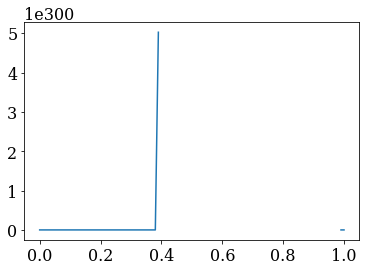

In [11]:
print(p[-1],p[-2])
pyplot.plot(x,p)